# Final Project Correction
## The first part: 
The correction of Project which generated by AI with Cardio project
* The correction of formula in calculating female and male ratio;
* The correction of shown label on bar in the visualization chart.
## The second part: 
The correction of Project which generated by AI with LostFound project:
* Adding time information for both donate system and borrow system

## Part 1:
### First correction
* Correction of male & female ratio formula

In [1]:
# You will need to import these two packages.
# !pip install scipy
import pandas as pd
import matplotlib.pyplot as plt
# !pip install seaborn
import os
print(os.getcwd())

/Users/joyceka_yu/Desktop/py


In [2]:
# This is your dataset.
data = pd.read_csv("FitnessTracker.csv")
data.head()

,TrackerModel,CustomerAge,CustomerGender,CustomerEducation,CustomerMaritalStatus,WeeklyUsage,HealthScore,AnnualIncome,CaloriesBurned
0,FT100,34,Male,16,Married,1,1,106849,2838
1,FT200,41,Male,13,Single,1,1,115578,2604
2,FT300,45,Male,18,Married,7,5,45305,815
3,FT200,39,Male,15,Single,1,5,105014,3921
4,FT200,39,Female,15,Single,1,1,35423,4177


In [3]:
# 1. How many records in the dataset?
a1 = len(data) 
print(a1) #200

200


In [4]:
#4.What is the ratio between 'Female' and 'Male' in the column CustomerGender (Female/Male)?
#According to your suggestion, there can be two interpretations. The first is to provide a notion when there are no male
female = len(data[data['CustomerGender'] == 'Female'])
male = len(data[data['CustomerGender'] == 'Male'])
ratio = female/(male+female)
if ratio==1:
    a4="There are no male data provided!"
    print(a4)
else:
    a4=female/male
    print(a4)  #0.9801980198019802

#The second is to change the question, to let it be the ratio between female and total number of customers in order to aviod 0 in the denominator
female = len(data[data['CustomerGender'] == 'Female'])
a4=female/a1
print(a4)  #0.495

0.9801980198019802
0.495


### Second correction
* Updating data visualization chart: Present mean value instead of total value on the chart.

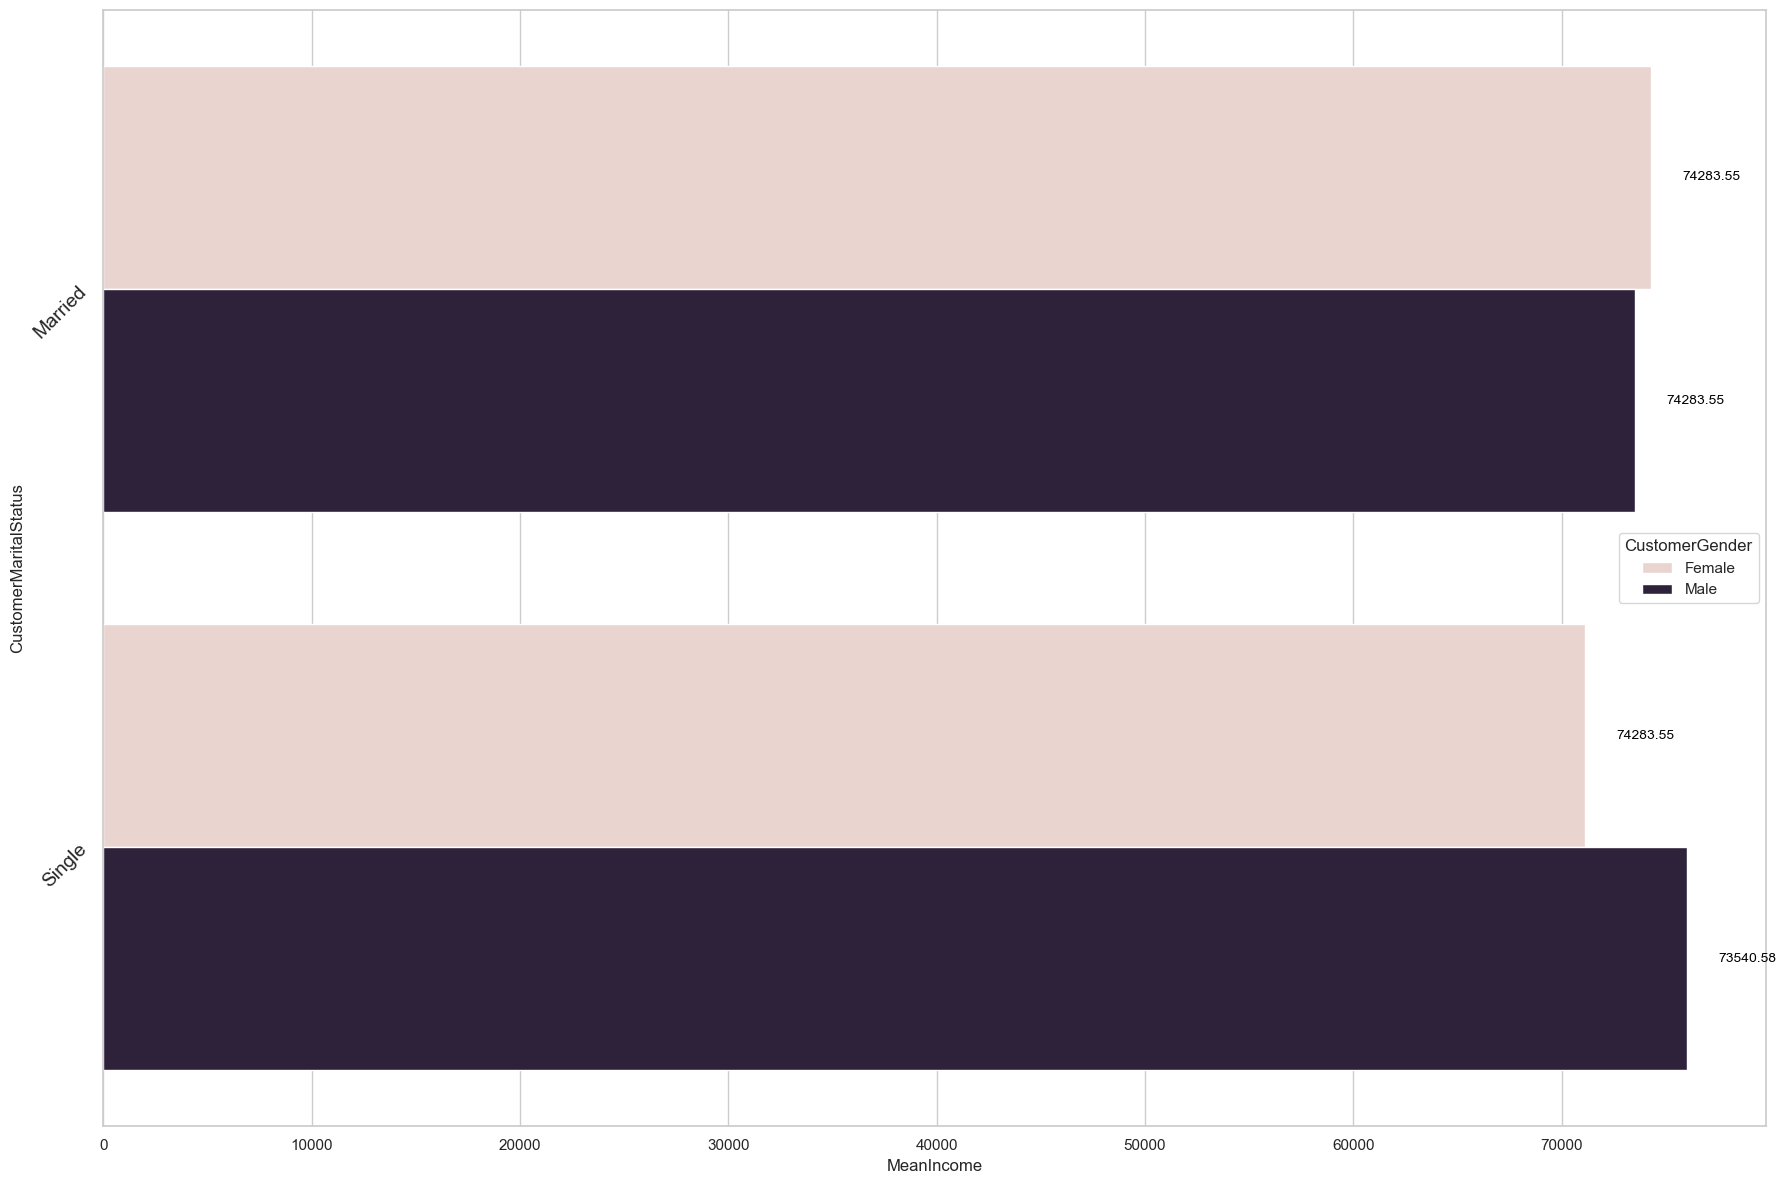

In [5]:
#horizontal barplot, we change the values to be the mean values, in order to do further pairwise t-test
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style='whitegrid', palette='muted')

# Calculate the mean
mean_income = data.groupby(['CustomerMaritalStatus', 'CustomerGender'])['AnnualIncome'].mean().reset_index(name='MeanIncome')

fig, ax = plt.subplots(figsize=(18, 12))  # Increase the figure size for more space
sns.barplot(data=mean_income, x='MeanIncome', y='CustomerMaritalStatus', palette='ch:30', hue='CustomerGender', errorbar=None, ax=ax)

#Bars with the mean income values
for patch in ax.patches[0:4]:
    # Get the position and size of each bar
    width = patch.get_width()
    height = patch.get_height()
    y_position = patch.get_y() + height / 2
    marital_status = mean_income.iloc[int(y_position)]['CustomerMaritalStatus']
    gender = mean_income.iloc[int(y_position)]['CustomerGender']

    # Get the mean value of annual income
    mean_val = mean_income[(mean_income['CustomerMaritalStatus'] == marital_status) & 
                            (mean_income['CustomerGender'] == gender)]['MeanIncome'].values[0]

    # To avoid overlap with labels
    ax.text(width + 1500, y_position, f"{mean_val:.2f}", ha="left", va="center", fontsize=10, color="black")

plt.yticks(rotation=45, ha='right')

plt.subplots_adjust(right=0.85)  # Adjust right side to make space for text
plt.tight_layout()  #To avoid overlap

# Change the font size of CustomerMaritalStatus
for label in ax.get_yticklabels():
    label.set_fontsize(14)  

plt.show()

# Part 2:
* Adding Time

In [6]:
import datetime

In [7]:
class Book:
    '''
    The Book class is used to create instances of books in the system.

    Each book includes the following attributes:
        title: the title of the book (string)
        author: the author of the book (string)
        status: the availability status of the book, which could be "Available" or "Lent"
        donor: the person who donated the book (string)
        borrower: the person who borrowed the book (default: empty string)
    '''
    next_id = 1
    
    def __init__(self, title, author, status, donor,donatetime = None, borrower = None, borrowtime = None,  ):
        self.bookID = Book.next_id
        Book.next_id += 1
        self.title = title
        self.author = author
        self.status = status
        self.donor = donor
        self.borrower = borrower
        self.donatetime = donatetime
        self.borrowtime = borrowtime

    def toString(self):
        """
        Returns a string description of the book with details separated by commas.
        """
        return f"{self.bookID},{self.title},{self.author},{self.status},{self.donor},{self.donatetime},{self.borrower},{self.borrowtime}"

In [8]:
class LibrarySystem:
    '''
    The LibrarySystem class is the main system of the software.

    It provides functionalities for managing books, including:
        - Adding donated books
        - Borrowing books
        - Returning books
        - Displaying the inventory
    '''

    BookList = []  # A list to store all books in the system
    DonorScore = {}  # A dictionary to store each donor's score based on the number of donated books

    def start():
        """
        Starts the system by loading data from the "library.csv" file.
        """
        try:
            with open("library.csv", "r") as file:
                records = file.read().strip().split("\n")
            
                max_book_id = 0 
        
                for i, record in enumerate(records):
                    if not record.strip():
                        continue

                    try:
                        bookID, title, author, status, donor, donatetime, borrower , borrowtime= record.split(",")
                        bookID = int(bookID) 
                        donatetime = donatetime.strip() if donatetime.strip() else "N/A" #Add datetime here
                        borrowtime = borrowtime.strip() if borrowtime.strip() else "N/A"
                        max_book_id = max(max_book_id, bookID) 
                        book = Book(title, author, status, donor, donatetime, borrower, borrowtime)
                        book.bookID = bookID 
                        LibrarySystem.BookList.append(book)
                        if donor in LibrarySystem.DonorScore:
                            LibrarySystem.DonorScore[donor] += 1
                        else:
                            LibrarySystem.DonorScore[donor] = 1
                    except Exception as e:
                        print(f"Error processing record at line {i}: {e}")

                Book.next_id = max_book_id + 1 

        except FileNotFoundError:
            print("No existing library database found. Starting with an empty system.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

        print("\nLibrary System is now running.\n")
        LibrarySystem.interact()
        return
    
    def interact():
        """
        Provides a user-friendly console interface for interacting with the Library System.
        """
        print("\n--- Welcome to the Library System ---")
        while True:
            print("\nPlease choose an option:")
            print("1. Donate a book")
            print("2. Borrow a book")
            print("3. Return a book")
            print("4. Display inventory")
            print("5. Exit system")
            choice = input("\nEnter your choice (1-5): ").strip()

            if choice == "1":
                # Donate Book
                print("\n--- Donate a Book ---")
                title = input("Enter the title of the book: ").strip()
                author = input("Enter the author of the book: ").strip()
                donor = input("Enter the donor's name: ").strip()
                donatetime = datetime.date.today().strftime("%Y-%m-%d")
                book = Book(title, author, "Available", donor, donatetime)
                LibrarySystem.donate(book)
            elif choice == "2":
                # Borrow Book
                print("\n--- Borrow a Book ---")
                title = input("Enter the title of the book you want to borrow: ").strip()
                LibrarySystem.borrow(title)
            elif choice == "3":
                # Return Book
                print("\n--- Return a Book ---")
                title = input("Enter the title of the book you want to return: ").strip()
                LibrarySystem.returnBook(title)
            elif choice == "4":
                # Display Library
                print("\n--- Display Library Inventory ---")
                LibrarySystem.display()
            elif choice == "5":
                # Exit System
                print("\nExiting the Library System...")
                LibrarySystem.exit()
                break
            else:
                print("Invalid choice. Please try again.")       
        return


    def exit():
        """
        Exits the system by saving the current inventory to the "library.csv" file.
        """
        with open("library.csv", "w") as file:
            for book in LibrarySystem.BookList:
                file.write(book.toString() + "\n")
        LibrarySystem.BookList.clear()
        LibrarySystem.DonorScore.clear()
        print("\nLibrary System has been closed.\n")

    def donate(book):
        """
        Adds a donated book to the system and updates the donor's score.
        """
        LibrarySystem.BookList.append(book)
        if book.donor in LibrarySystem.DonorScore:
            LibrarySystem.DonorScore[book.donor] += 1
        else:
            LibrarySystem.DonorScore[book.donor] = 1
        print(f"New book'{book.title}' reported by {book.donor} on {book.donatetime}.")
        

    def borrow(title):
        """
        Allows a user to borrow a book by title. If multiple books have the same title,
        display all matching books with their IDs and let the user select one to borrow.
        """
        matching_books = [book for book in LibrarySystem.BookList if book.title.lower() == title.lower()]
    
        if not matching_books:
            print(f"No books found with the title '{title}'.")
            return

        print(f"Found {len(matching_books)} book(s) with the title '{title}':")
        print(f"\n{'ID':<5}{'Title':<30}{'Author':<20}{'Status':<15}{'Borrower':<20}{'BorrowTime':<20}")
        print("-" * 120)
        for book in matching_books:
            print(f"{book.bookID:<5}{book.title:<30}{book.author:<20}{book.status:<15}{book.borrower:<20},{book.borrowtime:<20}")
    
        try:
            book_id = int(input("\nEnter the book ID you want to borrow: ").strip())
            for book in matching_books:
                if book.bookID == book_id:
                    if book.status == "Available":
                        borrower_name = input("Enter your name: ").strip()
                        book.status = "Lent"
                        book.borrower = borrower_name
                        book.borrowtime = datetime.date.today()
                        print(f"'{book.title}' (ID: {book.bookID}) has been successfully borrowed by {borrower_name} on {book.borrowtime}.")
                        return
                    else:
                        print(f"'{book.title}' (ID: {book.bookID}) is currently lent out to {book.borrower}.")
                        return
            print("Invalid book ID. No changes made.")
        except ValueError:
            print("Invalid input. Please enter a valid book ID.")
        return

    def returnBook(title):
        """
        Allows a user to return a book by title. If multiple books have the same title,
        display all matching books with their IDs and let the user select one to return.
        """
        matching_books = [book for book in LibrarySystem.BookList if book.title.lower() == title.lower()]
    
        if not matching_books:
            print(f"No books found with the title '{title}'.")
            return

        print(f"Found {len(matching_books)} book(s) with the title '{title}':")
        print(f"\n{'ID':<5}{'Title':<30}{'Author':<20}{'Status':<15}{'Borrower':<20}{'BorrowTime':<20}")
        print("-" * 100)
        for book in matching_books:
            print(f"{book.bookID:<5}{book.title:<30}{book.author:<20}{book.status:<15}{book.borrower:<20}{book.borrowtime:<20}{book.borrowtime or '/':<20}")
    
        try:
            book_id = int(input("\nEnter the book ID you want to return: ").strip())
            for book in matching_books:
                if book.bookID == book_id:
                    if book.status == "Lent":
                        print(f"'{book.title}' (ID: {book.bookID}) has been successfully returned by {book.borrower}.")
                        book.status = "Available"
                        book.borrower = ""
                        return
                    else:
                        print(f"'{book.title}' (ID: {book.bookID}) is already available in the library.")
                        return
            print("Invalid book ID. No changes made.")
        except ValueError:
            print("Invalid input. Please enter a valid book ID.")
        return

    def display():
        """
        Displays all books in the inventory, including their status and donor information.
        """
        if not LibrarySystem.BookList:
            print("The library inventory is empty.")
            return
        if not LibrarySystem.BookList:
            print("The library inventory is empty.")
            return
        
        print("\nChose a type of display:")
        print("Enter 1 to display all book;")
        print("Enter 2 to display lent book;")
        print("Enter 3 to display available book;")
        chosen = int(input("Your choice is:").strip())
        
        print(f"\n{'ID':<5}{'Title':<30}{'Author':<20}{'Status':<15}{'Donor':<20}{'DonateTime':<20}{'Borrower':<20}{'BorrowTime':<20}")
        print("-" * 150)
        for book in LibrarySystem.BookList:
            donatetime = book.donatetime or "/"
            borrowtime = book.borrowtime or "/"
            borrower = book.borrower or "/"
            
            if chosen == 1:
                print(f"{book.bookID:<5}{book.title:<30}{book.author:<20}{book.status:<15}{book.donor:<20}{donatetime:<20}{borrower:<20}{borrowtime:<20}")
            elif chosen == 2:
                if book.status == "Lent":
                    print(f"{book.bookID:<5}{book.title:<30}{book.author:<20}{book.status:<15}{book.donor:<20}{donatetime:<20}{borrower:<20}{borrowtime:<20}")
            elif chosen == 3:
                if book.status != "Lent":
                    print(f"{book.bookID:<5}{book.title:<30}{book.author:<20}{book.status:<15}{book.donor:<20}{donatetime:<20}{borrower:<20}{borrowtime:<20}")
            else:
                print("Invalid value")
                return
            
        if LibrarySystem.DonorScore:
            print("\nDonor Leaderboard (Sorted by Contributions):")
            print(f"{'Donor':<20}{'Score':<10}")
            print("-" * 30)
            sorted_donors = sorted(LibrarySystem.DonorScore.items(), key=lambda x: x[1], reverse=True)
            for donor, score in sorted_donors:
                print(f"{donor:<20}{score:<10}")
        else:
            print("\nNo donors in the leaderboard yet.")



Testing cell:

In [9]:
LibrarySystem.start()

No existing library database found. Starting with an empty system.

Library System is now running.


--- Welcome to the Library System ---

Please choose an option:
1. Donate a book
2. Borrow a book
3. Return a book
4. Display inventory
5. Exit system

--- Donate a Book ---
New book'2sda' reported by dasdasd on 2024-12-09.

Please choose an option:
1. Donate a book
2. Borrow a book
3. Return a book
4. Display inventory
5. Exit system

--- Display Library Inventory ---

Chose a type of display:
Enter 1 to display all book;
Enter 2 to display lent book;
Enter 3 to display available book;

ID   Title                         Author              Status         Donor               DonateTime          Borrower            BorrowTime          
------------------------------------------------------------------------------------------------------------------------------------------------------
1    2sda                          sdfsjof             Available      dasdasd             2024-12-09    